# Cancer Classifier

In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

##  1.

- Let’s begin by importing the breast cancer data from `sklearn`. 
- We want to import the function `load_breast_cancer` from `sklearn.datasets`.
- Once we’ve imported the dataset, let’s load the data into a variable called `breast_cancer_data`. 
- Do this by setting `breast_cancer_data` equal to the function `load_breast_cancer()`.

In [2]:
breast_cancer_data = load_breast_cancer()

##  2.

- Before jumping into creating our classifier, let’s take a look at the data. 
- Begin by printing `breast_cancer_data.data[0]`. 
- That’s the first datapoint in our set. 
- But what do all of those numbers represent? 
- Let’s also print `breast_cancer_data.feature_names`.

In [5]:
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##  3.

- We now have a sense of what the data looks like, but what are we trying to classify? 
- Let’s print both `breast_cancer_data.target` and `breast_cancer_data.target_names`.
- Was the very first data point tagged as malignant or benign?

In [7]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

##  4.

- We have our data, but now it needs to be split into training and validation sets. 
- Luckily, sklearn has a function that does that for us. 
- Begin by importing the `train_test_split` function from `sklearn.model_selection`.

##  5.

- Call the `train_test_split` function. 
- It takes several parameters:
    - The data you want to split (for us `breast_cancer_data.data`)
    - The labels associated with that data (for us, `breast_cancer_data.target`).
    - The `test_size`. This is what percentage of your data you want to be in your testing set. Let’s use `test_size = 0.2`
    - `random_state`. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used `random_state = 100`.

In [13]:
train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

[array([[1.305e+01, 1.931e+01, 8.261e+01, ..., 1.111e-02, 2.439e-01,
         6.289e-02],
        [1.288e+01, 2.892e+01, 8.250e+01, ..., 6.493e-02, 2.372e-01,
         7.242e-02],
        [1.575e+01, 1.922e+01, 1.071e+02, ..., 2.135e-01, 4.245e-01,
         1.050e-01],
        ...,
        [1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
         6.825e-02],
        [1.286e+01, 1.800e+01, 8.319e+01, ..., 7.926e-02, 2.779e-01,
         7.918e-02],
        [9.295e+00, 1.390e+01, 5.996e+01, ..., 7.262e-02, 3.681e-01,
         8.982e-02]], shape=(455, 30)),
 array([[1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
         1.198e-01],
        [1.434e+01, 1.347e+01, 9.251e+01, ..., 1.087e-01, 3.062e-01,
         6.072e-02],
        [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
         5.933e-02],
        ...,
        [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
         6.169e-02],
        [1.825e+01, 1.998e+01, 1.196e+02, ..., 1.932e-0

##  6.

- Right now we’re not storing the return value of `train_test_split`. 
- `train_test_split` returns four values in the following order:
    - The training set
    - The validation set
    - The training labels
    - The validation labels
- Store those values in variables named `training_data`, `validation_data`, `training_labels`, and `validation_labels`.

In [12]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

##  7.

- Let’s confirm that worked correctly. 
- Print out the length of `training_data` and `training_labels`. 
- They should be the same size - one label for every piece of data!

In [16]:
assert len(training_data) == len(training_labels)

##  8.

- Now that we’ve created training and validation sets, we can create a `KNeighborsClassifier` and test its accuracy. 
- Begin by importing `KNeighborsClassifier` from `sklearn.neighbors`.

##  9.

- Create a `KNeighborsClassifier` where `n_neighbors = 3`. 
- Name the classifier `classifier`.

In [18]:
classifier = KNeighborsClassifier(n_neighbors=3)

##  10.

- Train your classifier using the fit function. 
- This function takes two parameters: 
    - the training set  
    - the training labels.

In [19]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

##  11.

- Now that the classifier has been trained, let’s find how accurate it is on the validation set. 
- Call the classifier’s `score` function. 
- `score` takes two parameters: 
    - the validation set  
    - the validation labels. 
- Print the result!

In [20]:
classifier.score(validation_data, validation_labels)

0.9473684210526315

##  12.

- The classifier does pretty well when `k = 3`. 
- But maybe there’s a better `k`! 
- Put the previous 3 lines of code inside a for loop. 
- The loop should have a variable named k that starts at `1` and increases to `100`. 
- Rather than `n_neighbors` always being `3`, it should be this new variable `k`.
- You should now see 100 different validation accuracies print out. 
- Which k seems the best?

In [46]:
scores = {}

for i in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(training_data, training_labels)
    scores[i] = classifier.score(validation_data, validation_labels)

In [47]:
max_score = max(scores, key=scores.get)
max_score, scores[max_score]

(23, 0.9649122807017544)

##  13.

 - We now have the validation accuracy for 100 different `k`s. 
 - Rather than just printing it out, let’s make a graph using `matplotlib`. 
 - Begin by importing `matplotlib.pyplot as plt`.

##  14.

- The x-axis should be the values of `k` that we tested. 
- This should be a list of numbers between `1` and `100`. 
- You can use the `range` function to make this list. 
- Store it in a variable named `k_list`.

##  15.

- The y-axis of our graph should be the validation accuracy. 
- Instead of printing the validation accuracies, we want to add them to a list. 
- Outside of the for loop, create an empty list named `accuracies`. 
- Inside the for loop, instead of printing each accuracy, append it to `accuracies`.

## 16.

- We can now plot our data! Call `plt.plot()`. 
- The first parameter should be `k_list` and the second parameter should be `accuracies`.
- After plotting the graph, show it using `plt.show().`

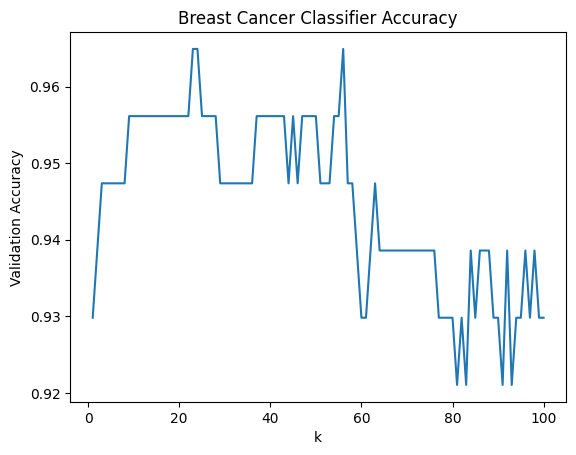

In [50]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

## 17.

- Let’s add some labels and a title. 
- Set the x-axis label to `"k"` using `plt.xlabel()`. 
- Set the y-axis label to `"Validation Accuracy"`. 
- Set the title to `"Breast Cancer Classifier Accuracy"`.